# Coma Cluster

In [1]:
import pandas as pd
import os

In [2]:
coma = pd.read_csv('SSDS_COMA.csv', delimiter=',', nrows=764, skiprows=[0])
#coma = pd.read_csv(r"/home/jupyter/Astronomy 303/SSDS_COMA.csv")
#coma.head()

In [3]:
coma

,objID,ra,dec,modelMag_r,modelMagErr_r,extinction_r,class,redshift,zerr,velDisp,velDisperr
0,1237667322724024468,194.976396,26.819967,15.87394,0.003323,0.021009,GALAXY,0.026741,0.000017,24.52307,13.338430
1,1237667442974982311,195.019097,27.032470,16.73576,0.006262,0.022530,GALAXY,0.023210,0.000031,45.74616,14.019450
2,1237667322724024401,195.014696,26.898107,13.49986,0.001930,0.022515,GALAXY,0.019764,0.000008,125.55930,2.994381
3,1237667323798159456,196.046867,27.490444,14.87960,0.002653,0.024423,GALAXY,0.017770,0.000012,72.12569,5.633148
4,1237667323798159557,196.068599,27.506385,16.19275,0.006796,0.024259,GALAXY,0.023533,0.000036,19.52088,20.236960
...,...,...,...,...,...,...,...,...,...,...,...
756,1237667444585988288,196.153757,28.250510,16.53448,0.004102,0.018968,GALAXY,0.018743,0.000015,45.99926,5.679860
757,1237667444585988306,196.173652,28.227532,16.94125,0.006289,0.018940,GALAXY,0.024035,0.000028,22.59061,17.630390
758,1237667444586053729,196.302131,28.152430,15.92908,0.003446,0.021361,GALAXY,0.021729,0.000013,81.73788,4.994911
759,1237667444586119179,196.453582,28.106538,15.50194,0.002891,0.024498,GALAXY,0.024408,0.000010,183.26830,4.156258


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ra1 = []
dec1 = []
rmag1 = []
z1 = []
for n in range(0,761):
    ra1.append(coma['ra'][n])
    dec1.append(coma['dec'][n])
    rmag1.append(coma['modelMag_r'][n])
    z1.append(coma['redshift'][n])

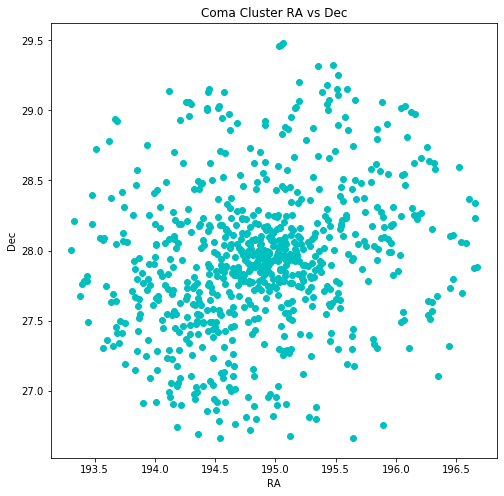

In [6]:
plt.figure(figsize=(8,8))

plt.title('Coma Cluster RA vs Dec')
plt.xlabel('RA')
plt.ylabel('Dec')
#axes.set_xlim([193,197])
#axes.set_ylim([26.5,29.5])
plt.plot(ra1,dec1,'co')


In [7]:
import numpy as np

#############################
# want weight to come from the bright galaxies
#m = M + 2.5*np.log(f)
#############################
M = 4.76
m = np.asarray(rmag1)
#print(rmag)
f =10**((M-m)/2.5)
#print(f) 

In [8]:

#### most of the weight should come from the bright galaxies! 

plt.figure(figsize=(8,8))

print(f.sum())
A = (f*ra1).sum()/f.sum()
B = (f*dec1).sum()/f.sum()
print(A, B)

for i in range(0,761): #range(0,761)
    a = ((f[i]*ra1[i]).sum()/f.sum())
    b = ((f[i]*dec1[i]).sum()/f.sum())
    #print(a,b)    

#for i in coma:
 #   num = (f[i]*ra[i])
  #  div = f.sum()
   # RA = num/div
    #nom = (f[i]*dec[i])
    #DEC = nom/div
    #plt.xlabel('RA')
    #plt.ylabel('DEC')
    #plt.scatter(RA,DEC)


0.05695395374851722
194.88691385268973 27.958158901876946


<Figure size 576x576 with 0 Axes>

### 4. Next, create a histogram of the galaxies’ redshifts. Plot this redshift histogram. 
The redshift range, 0.005 ≤ z ≤ 0.05 used for our search sets the max and min values. Suggested bin size is
∆z = 0.001, which still gives enough galaxies in the central bins. The clearly noticeable peak in
the histogram corresponds to the redshift of Coma cluster! Fit a gaussian function to this redshift
histogram. The central value of the fitted gaussian is the redshift of Coma, and the standard deviation
is the 1σ uncertainty.

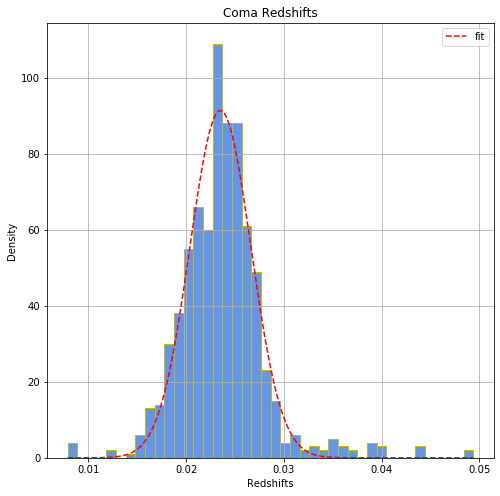

mean= 0.0235 simga= 0.0044


In [9]:
#  do not fit a normalized pdf. 

from astropy.visualization import hist
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(8,8))
width = 0.001

n = math.ceil((coma['redshift'].max() - coma['redshift'].min())/width)
ax = plt.hist(coma['redshift'], bins = n, histtype='bar', ec='y', color='cornflowerblue')

plt.title('Coma Redshifts')
plt.ylabel('Density')
plt.xlabel('Redshifts')
plt.grid(1)

##########################################
import statistics as stat
z = np.asarray(z1)

mu = stat.median(z)
sigma = stat.stdev(z)

##########################################

a = 1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma))

def Gauss(z, a, mu, sigma):
    return a*(np.exp(-((z - mu)**2 / (2 * sigma))))

bin_heights, bin_borders, _ = ax
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Gauss, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, Gauss(x_interval_for_fit, *popt),'r--',label='fit')
plt.legend()

#######################################
plt.show()
print('mean=','%.4f' % mu,'simga=','%.4f' % sigma)

#####################################

#y = mlab.fit( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=2)


### 5. Using the redshift of Coma, calculate the recessional velocity of the cluster (using the Doppler shift
formula). Then use the Hubble’s Law to convert the recessional velocity to the distance to the cluster
(in Mpc). Use the value of Hubble’s constant as determined by the Planck mission (given in Table 1).

$$v_{r}=H_{0}D\ $$
$$ z = v_{r}/c $$

In [10]:
vr = mu*299792
print('𝑣𝑟 =',vr,'km/s')
R = vr/ 67.8 
print('Distance=',R,'Mpc')
#km.s−1.Mpc−1

𝑣𝑟 = 7049.50994864 km/s
Distance= 103.97507298879057 Mpc


In [11]:
#Distance to each galaxy based on z
import numpy as np
z = np.asarray(z1)
R2 = np.asarray(z*299892)/(67.8)
#print(R2)

#vr1 = z*299792
#R2 = vr1 // 67.8
#print(R2)#MPc

# CHECK NUMBERS





### 6. Using the RA, Dec positions of all the galaxies, calculate their projected radial distances from the center
of Coma, as determined in Step 3.

**Important note**: To calculate the projected radial distance, use the small angle formula (given
the low redshift of Coma, we will assume Euclidean (flat) geometry and neglect any corrections for
cosmology). Here the small angle refers to the angular separation in RA and Dec between each galaxy
and central position of Coma. Remember to apply the cos(Dec) correction for RA offsets;
also use proper angular units!

$$ cos 𝜃 = sin(𝛿)sin(𝛿𝑔)+cos(𝛿)cos(𝛿𝑔)sin(𝛼−𝛼𝑔) $$
$$ 𝛼,𝛿 = center coordinates $$
$$ 𝛼𝑔,𝛿𝑔  = galaxy coordinates $$
$$ 𝑟=𝐷tan(𝜃)≃𝐷𝜃 $$

In [12]:
# RA --> (Galaxy ra - center coordinates ra) == delta RA 
# DEC --> (GALAXY dec - center coordinates dec)

# separation in RA = delta RA*(cos avg.Dec) (in degrees) --> need arcsec
# separation in DEC = > dec (no correction) --> need arcseconds
# avg dec = Galaxy dec + center dec /2 

### Total distance == sqrt ((separation in RA)^2 + (separation in DEC)^2) = separation 

In [13]:
# Converting Ra & dec from degress into radians & arcseconds
ã = A*(np.pi/180)
ß = B*(np.pi/180)
print(ã, ß) #coordinates of cluster center in radians

3.401418315779983 0.487961925633515


In [14]:
### cos (dec) correction

#ra2,dec2 = [],[]
ra2 = np.asarray(ra1)
dec2 = np.asarray(dec1)

#ra2 = (ra-A)*(np.pi/180)
#dec2 = (dec-B)*np.pi/180

########
#dec_av =[]
dec_av = (((dec2**2)+(B**2))/2)*(np.pi/180)
#print(dec_av)


    
𝛼𝑔 = (ra2*(np.cos(dec_av))) ## RA == alpha
𝛿𝑔 = dec2 ## DEC == delta
##
#print(𝛼𝑔,𝛿𝑔)
#######


In [15]:
print(A,B) #(ra, dec)
dec_av = (((dec2**2)+(B**2))/2)
𝛼𝑔 = (ra2*(np.cos(dec_av))) ## RA == alpha

#arc = (A-ra)*np.cos(dec)
########################## ************* ############################## THIS IS IT ################
𝜃 = np.arccos(np.sin(B)*np.sin(dec2)+np.cos(B)*np.cos(dec2)*np.cos(A-𝛼𝑔))
thet = 𝜃*(np.pi/180)*(206265)
par2 = R2*(10**6)
par = 103970000
#round(1.4756,2)
p = np.round((par*thet)*4.848e-12,1)
#print(p)

print(len(p),len(thet))
#print(p[10:60],'Mpc')
#print('theta',thet[10:60])


194.88691385268973 27.958158901876946
761 761


### 7. **Select all the galaxies within a radial distance of 1.5Mpc from the center of the cluster**,
and with redshifts within ±3σ from the redshift of Coma as galaxies belonging to the
Coma Cluster. These are referred as the member galaxies.

In [16]:
for item in p: #select to see all projected distance values that are <= to 1.5 Mpc

    if item <= 1.5:
        print(item)       

1.2
1.3
0.3
0.2
1.0
1.0
1.5
1.4
1.3
1.5
0.6
0.7
0.5
1.4
1.0
0.4
1.2
1.5
1.2
1.0
1.3
1.2
0.3
1.5
1.3
0.7
0.8
0.4
1.4
1.3
1.5
1.5
1.3
1.2
1.1
1.2
1.5
0.6
0.4
0.6
1.0
0.6
1.4
0.6
0.6
1.1
1.2
0.7
0.8
1.5
1.5
1.1
1.5
0.8
0.8
1.3
1.1
1.1
1.1
1.3
1.4
1.2
0.5
1.4
1.2
0.6
1.5
0.6
0.4
1.5
1.5
0.6
0.9
0.7
0.6
1.3
1.3
0.9
1.3
1.1
1.5
1.3
1.3
1.4
1.0
1.3
1.2
0.8
1.4
0.3
1.2
0.7
0.4
1.3
1.5
0.6
0.8
1.1
0.7
0.7
1.5
0.8
0.8
0.8
1.3
1.3
0.5
0.9
1.5
0.1
0.4
1.0
1.1
1.0
1.3
1.2
0.5
0.4
0.6
0.4
0.6
0.3
1.3
0.9
1.0
0.9
1.3
1.5
1.5
1.4
1.0
0.9
1.4
0.9
1.3
1.3
1.5
1.1
1.5
0.6
0.9
1.0
0.9
0.6
1.2
0.2
0.2
0.2
1.3
0.3
1.3
0.4
1.2
0.3
1.0
1.5
0.4
0.4
0.5
0.3
0.1
0.3
1.4
0.7
1.1
0.8
0.8
0.6
0.5


In [17]:
########## IMPORTANT CELL ###########

# index of all values in p that are <=1.5
def condition(x): return x <= 1.5
output = [idx for idx, element in enumerate(p) if condition(element)]

#print(output)
print(len(output), 'values are <=1.5')
print('These values are', p[output])
print('the corresponding indeces are', output)


#for redshift
σ = np.asarray([])
σ = 5*0.0044
print(σ)
#print(output)

169 values are <=1.5
These values are [1.2 1.3 0.3 0.2 1.  1.  1.5 1.4 1.3 1.5 0.6 0.7 0.5 1.4 1.  0.4 1.2 1.5
 1.2 1.  1.3 1.2 0.3 1.5 1.3 0.7 0.8 0.4 1.4 1.3 1.5 1.5 1.3 1.2 1.1 1.2
 1.5 0.6 0.4 0.6 1.  0.6 1.4 0.6 0.6 1.1 1.2 0.7 0.8 1.5 1.5 1.1 1.5 0.8
 0.8 1.3 1.1 1.1 1.1 1.3 1.4 1.2 0.5 1.4 1.2 0.6 1.5 0.6 0.4 1.5 1.5 0.6
 0.9 0.7 0.6 1.3 1.3 0.9 1.3 1.1 1.5 1.3 1.3 1.4 1.  1.3 1.2 0.8 1.4 0.3
 1.2 0.7 0.4 1.3 1.5 0.6 0.8 1.1 0.7 0.7 1.5 0.8 0.8 0.8 1.3 1.3 0.5 0.9
 1.5 0.1 0.4 1.  1.1 1.  1.3 1.2 0.5 0.4 0.6 0.4 0.6 0.3 1.3 0.9 1.  0.9
 1.3 1.5 1.5 1.4 1.  0.9 1.4 0.9 1.3 1.3 1.5 1.1 1.5 0.6 0.9 1.  0.9 0.6
 1.2 0.2 0.2 0.2 1.3 0.3 1.3 0.4 1.2 0.3 1.  1.5 0.4 0.4 0.5 0.3 0.1 0.3
 1.4 0.7 1.1 0.8 0.8 0.6 0.5]
the corresponding indeces are [3, 8, 27, 32, 33, 35, 37, 67, 68, 73, 75, 83, 86, 89, 91, 105, 107, 113, 123, 124, 132, 133, 138, 142, 143, 148, 154, 162, 165, 168, 174, 202, 218, 222, 234, 239, 240, 247, 250, 251, 253, 255, 257, 258, 259, 263, 266, 270, 271, 282, 287, 296, 2

In [18]:
#################### REDSHIFT WORKING ###########################
#################### USED 5 SIGMA INSTEAD OF 3 ###########################

#print(output,z[output])
#print(-σ,σ)

for item in z[output]:
     if ((item<σ) and (item>-σ)) : print(item)
            
#################### REDSHIFT MIGHT BE WORKING ###########################
def condition1(x1): return ((x1<σ) and (x1>-σ))
OP = [idx1 for idx1, element in enumerate(z[output]) if condition1(element)]

print(OP)

print(len(OP), 'values are +/- 5σ',σ)
print('These values are', z[OP])
print('the corresponding indeces are', OP)

    #if ((item<σ).any() and (item>-σ).any()) : print(item)
    #print('redshift values between sigma and negative sigma',z[item])

0.01777024
0.02002974
0.02108984
0.02068225
0.02093789
0.01661109
0.02128608
0.02129176
0.02039584
0.02155076
0.02044867
0.0191456
0.02051797
0.02144919
0.01886249
0.02015118
0.01965179
0.01820282
0.01806066
0.0210654
0.01953211
0.02190111
0.01798755
0.01718794
0.02098727
0.01816591
0.01921797
0.02185673
0.02018797
0.01738534
0.01899429
0.02083039
0.01699532
0.02170492
0.01912005
0.02047269
0.01662251
0.01935221
0.01983889
0.01655244
0.01964111
0.02022178
0.02005155
0.02090726
0.01608296
0.02080937
0.02150175
0.02124036
0.02111432
0.017733000000000002
0.01935512
[0, 4, 12, 16, 17, 21, 25, 27, 31, 35, 36, 39, 44, 45, 52, 53, 54, 56, 57, 60, 61, 62, 64, 66, 70, 75, 79, 81, 82, 84, 90, 91, 97, 102, 112, 114, 117, 120, 122, 125, 134, 135, 136, 137, 142, 145, 149, 150, 152, 153, 159]
51 values are +/- 5σ 0.022000000000000002
These values are [0.02674099 0.02353255 0.0260466  0.02404518 0.02031774 0.02531029
 0.02366776 0.0282389  0.02615086 0.02250939 0.02626066 0.02092743
 0.02694282 0.024

In [19]:
#for i in z[output]:
 #   if ((i<σ) and (i>-σ)): print(i)
#for item in p:
 #   if item <= 1.5: print(item)


In [20]:
#for item in p:
#    if item == 1.5: print('True')
def condition(x): return x == 1.5
output2 = [idx for idx, element in enumerate(p) if condition(element)]
print(output2)
ra6 = np.asarray(coma['ra'])
dec6=np.asarray(coma['dec'])
print('values at 1.5Mpc have ra, dec =',ra6[output2].max(),dec6[output2].max())

[37, 73, 113, 142, 174, 202, 240, 282, 287, 298, 339, 357, 359, 416, 505, 527, 566, 640, 643, 659, 668, 706]
values at 1.5Mpc have ra, dec = 196.651635629513 28.745231600967802


In [21]:
ra5 = np.asarray(coma['ra']) #output == indices
dec5 = np.asarray(coma['dec'])

#z5 = np.asarray(coma['redshift'])

#### 8. With these subset of galaxies, repeat Steps 3 to 6####  
to get a better estimate of the sky position (RA,
Dec) of Coma as well as its redshift and 1σ uncertainty. Repeat this process till the RA, Dec, redshift
and the number of member galaxies do not change from one iteration to the next (these values should
converge in a few, ∼5 iterations). Report these RA, Dec, number of member galaxies and the
mean redshift of Coma in your report.


In [22]:
print(len(ra5[output]),len(dec5[output]))
print(ra5[output].mean(),dec5[output].mean())

169 169
194.89096253764797 27.870648099560125


#### 9. All subsequent steps are done using only these member galaxies. 

Recreate the RA, Dec plot (Step
2) with all the galaxies, and then overplot the selected galaxies in a different color. Also
plot a circle (in dashed lines) showing the 1.5Mpc region in

In [23]:
###### find radius ######
#rad = sqrt((dec of center-dec to max dec at 1.5MPC)^2 + (ra of center-ra to max ra at 1.5MPC)^2)
mdec = B - dec5[output].max()
mra = A - 𝛼𝑔[output].max()
print(dec5[output].max())

rad = np.sqrt((mra**2) + (mdec**2))
print(rad.mean())

28.745231600967802
1.1354826314406525


220


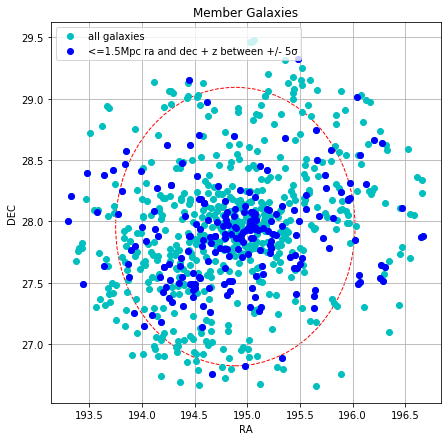

In [24]:
######## member galaxies #######

plt.figure(figsize=(7,7))

plt.plot(ra1,dec1,'co')
plt.plot(ra5[OP],dec5[OP],'bo')
plt.plot(ra5[output],dec5[output],'bo')
#####################
circle1 = plt.Circle((A,B),rad, color='r',fill=False,linestyle='--')
#circle1 = plt.Circle((ra6[output2].mean(), dec6[output2].mean()),1.5, color='r',fill=False,linestyle='--')
plt.gcf().gca().add_artist(circle1)
#####################

plt.legend(['all galaxies','<=1.5Mpc ra and dec + z between +/- 5σ'],loc=2)


#plot circle
plt.xlabel('RA')
plt.ylabel('DEC')
plt.grid(1)
plt.title('Member Galaxies')
#print(len(ra5[output]),len(ra5[OP]))
print(len(ra5[output])+len(ra5[OP]))


## Do the same for the redshift histogram in Step 4.

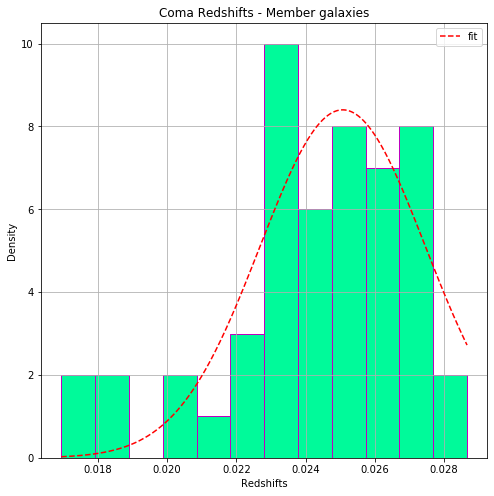

mean= 0.0243 simga= 0.0027


In [27]:
###FIX####
plt.figure(figsize=(8,8))
width = 0.001

n = math.ceil((z[OP].max() - z[OP].min())/width)
ax1 = plt.hist(z[OP], bins = n, histtype='bar', ec='m', color='mediumspringgreen')

plt.title('Coma Redshifts - Member galaxies')
plt.ylabel('Density')
plt.xlabel('Redshifts')
plt.grid(1)

##########################################

z_s = np.asarray(z[OP])

mu1 = stat.mean(z_s)
sigma1 = stat.stdev(z_s)

##########################################

a1 = 1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma1))

def Gauss1(z_s, a1, mu1, sigma1):
    return a1*(np.exp(-((z_s - mu1)**2 / (2 * sigma1))))

bin_heights, bin_borders, _ = ax1
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Gauss1, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, Gauss1(x_interval_for_fit, *popt),'r--',label='fit')

plt.legend()

#######################################
plt.show()
print('mean=','%.4f' % mu1,'simga=','%.4f' % sigma1)

#####################################

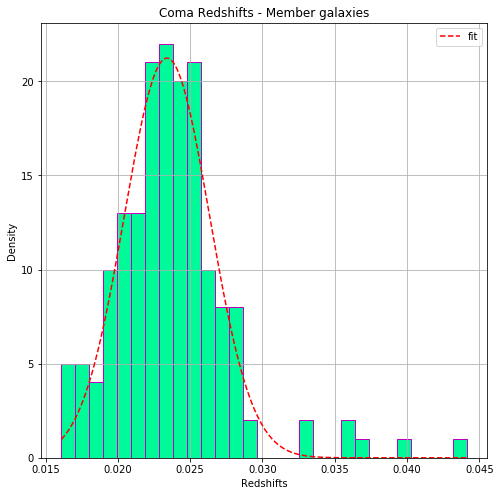

mean= 0.0237 simga= 0.0041


In [28]:
###FIX####
plt.figure(figsize=(8,8))
width = 0.001

n = math.ceil((z[output].max() - z[output].min())/width)
ax1 = plt.hist(z[output], bins = n, histtype='bar', ec='m', color='mediumspringgreen')

plt.title('Coma Redshifts - Member galaxies')
plt.ylabel('Density')
plt.xlabel('Redshifts')
plt.grid(1)

##########################################

z_s = np.asarray(z[output])

mu1 = stat.mean(z_s)
sigma1 = stat.stdev(z_s)

##########################################

a1 = 1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma1))

def Gauss1(z_s, a1, mu1, sigma1):
    return a1*(np.exp(-((z_s - mu1)**2 / (2 * sigma1))))

bin_heights, bin_borders, _ = ax1
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Gauss1, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, Gauss1(x_interval_for_fit, *popt),'r--',label='fit')

plt.legend()

#######################################
plt.show()
print('mean=','%.4f' % mu1,'simga=','%.4f' % sigma1)

#####################################


## 10. Use the SDSS r magnitudes and the extinction values in r-band along with the distance to Coma to calculate the absolute r-band magnitudes of the galaxies and the corresponding errors.###
$$\displaystyle m-M=5\left(\log _{10}d-1\right)+A $$
$$\delta d = 0.2 \ln(10) 10^{0.2\mu+1} \delta\mu = 0.461 d \ \delta\mu $$
$$\ Δ(log10)≈0.4343 Δd/d $$

Source https://www.physicsforums.com/threads/how-do-i-determine-the-uncertainty-value-of-the-stars-absolute-magnitude.967550/

In [39]:
## m - M = 5(log d - 1) + A
## d == distance to galaxies as measured above
## A == magnitudes of extinction

A = np.asarray(coma['extinction_r'])
m = np.asarray(coma['modelMag_r'])
δerr = np.asarray(coma['modelMagErr_r'])
#######################################
## R-MAG ABSOLUTE
RMAG = np.asarray([])
modulus = 5*(np.log10(R2[output]-1))+A[output]-m[output]
RMAG = -5*(np.log10(R2[output]*1e6)-1)-A[output]+m[output]
#print(R2*1e6)
### switch to R2 into parsecs *****
derr = 0.4343/(R2[output]*1e6)
#print('𝛿𝑑',derr)

##### ADD ERRORS #####
##### ABOUT 5% --> modulus, so 

δRMAG = 0.4343*np.sqrt((δerr[output]**2)+(derr**2))
print(RMAG,δRMAG)

[-19.62196541 -17.85685081 -17.85513889 -18.79302246 -18.28778702
 -18.0204334  -20.85440828 -20.0421658  -17.69837459 -19.67258872
 -18.23824842 -22.59083981 -17.11656736 -20.64660502 -19.80417219
 -17.61873637 -17.78896987 -19.93204058 -18.29124631 -19.24832687
 -18.53620128 -19.35705205 -19.08156531 -20.40617978 -17.34124574
 -18.76913986 -17.54005989 -18.49256418 -17.95616907 -21.10690626
 -18.91286124 -18.91149395 -21.49095868 -19.20714146 -18.56857369
 -17.91124282 -19.94230219 -19.48586226 -18.27946921 -19.44574208
 -18.25731534 -18.87997629 -19.67397666 -19.91821957 -19.35001898
 -17.97063153 -18.49106961 -18.16465917 -21.9679499  -19.04069836
 -22.00431451 -17.78492566 -20.24438752 -18.66526041 -17.50934928
 -17.9988411  -17.38539316 -19.08269154 -19.34413165 -20.54146704
 -17.55196749 -20.41397659 -17.82345918 -19.4717877  -17.19321472
 -17.80710316 -19.23317007 -20.87609338 -15.06556778 -20.59408353
 -18.34899057 -18.95833991 -21.02356081 -20.36559705 -18.61965469
 -17.59530

### 11. With the given r-band absolute magnitude of the Sun (see Table 1), convert the absolute magnitudes of the galaxies to corresponding luminosities (in units of solar luminosity).


$${\displaystyle M_{\text{bol1}}-M_{\text{bol2}}=-2.5\log _{10}{\frac {L_{\text{1}}}{L_{\text{2}}}}}$$


In [41]:
𝑀bol2 = 4.76
𝑀bol1 = RMAG
L_ratio = 10**((𝑀bol1-𝑀bol2)/-2.5)
luminosity = L_ratio
print(luminosity)
print(len(L_ratio))

[5.65960555e+09 1.11362847e+09 1.11187395e+09 2.63760030e+09
 1.65620774e+09 1.29471256e+09 1.76101604e+10 8.33424608e+09
 9.62387193e+08 5.92973779e+09 1.58233840e+09 8.71637532e+10
 5.63153702e+08 1.45425982e+10 6.69374058e+09 8.94323303e+08
 1.04613552e+09 7.53036857e+09 1.66149302e+09 4.01172125e+09
 2.08199898e+09 4.43425659e+09 3.44053615e+09 1.16539168e+10
 6.92625212e+08 2.58021530e+09 8.31809655e+08 1.99998010e+09
 1.22030286e+09 2.22209440e+10 2.94540146e+09 2.94169457e+09
 3.16507112e+10 3.86239408e+09 2.14501076e+09 1.17083885e+09
 7.60187763e+09 4.99280845e+09 1.64356802e+09 4.81168105e+09
 1.61037173e+09 2.85752814e+09 5.93732282e+09 7.43511735e+09
 4.40562563e+09 1.23666655e+09 1.99722892e+09 1.47864414e+09
 4.91111336e+10 3.31344177e+09 5.07838714e+10 1.04224606e+09
 1.00404923e+10 2.34479113e+09 8.08611122e+08 1.26921863e+09
 7.21368647e+08 3.44410684e+09 4.38180108e+09 1.32003917e+10
 8.40982575e+08 1.17379062e+10 1.07990032e+09 4.92850363e+09
 6.04346331e+08 1.063754

### 12. Calculate the cumulative luminosity of the cluster as a function of the radial distance from the cluster center. 

Normalize this cumulative distribution function (CDF) by the total luminosity of the cluster.
The total luminosity of the cluster is taken to be the cumulative luminosity at 1.5Mpc, which is the
maximum radial distance you used to select the member galaxies. Plot this normalized CDF of
luminosity as a function of radial distance from the cluster center.

#### (a) Cluster Samples
Since all cluster galaxies are at roughly the same distance:
bin galaxies by apparent magnitude, down to some limit, to get $$\phi (m)$$

use cluster redshift (distance) to get, simply, $$\phi (M)$$
Fit a Schechter function to $$\phi (M)$$ by minimizing $$\chi^2$$ to obtain M* and $$ \alpha\$$  .

x == value measuring ==radial distance from center, i.e. p[output]
y == fraction of values smaller than the corresponding x value

Reff,CDF=0.5 1.03 0.5002983498060078
Reff= 0.6670644664080104 Mpc
half radius 0.8894192885440139 Mpc
0.8894192885440139 0.4167976909035399


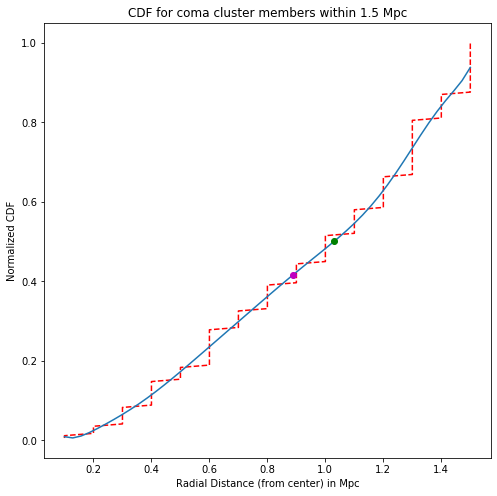

In [43]:
plt.figure(figsize=(8,8))

luminosity = np.asarray(L_ratio)
rd = np.linspace(0,1.5e6,169) #<-- x axis

radial_distances_sorted = np.sort(p[output]) #radial distances

x = np.sort(luminosity/luminosity.sum())
y = np.arange(1, len(x)+1)/len(x)   

plt.plot(radial_distances_sorted,y,'r--')

plt.xlabel('Radial Distance (from center) in Mpc')
plt.ylabel('Normalized CDF')
plt.title('CDF for coma cluster members within 1.5 Mpc')
########################################
j = np.polyfit(radial_distances_sorted, y, 10)
f = np.poly1d(j)

x_new = np.linspace(radial_distances_sorted[0], radial_distances_sorted[-1], 50)
y_new = f(x_new)

plt.plot(x_new,y_new)
print('Reff,CDF=0.5',1.03,f(1.03))
########################################

Reff = 4*f(1.03)/3
print('Reff=',Reff,'Mpc')
r_half = 4*Reff/3
print('half radius',r_half,'Mpc')


########################################
plt.plot(r_half,f(r_half),'mo')
print(r_half,f(r_half))
plt.plot(1.03,f(1.03),'go')
plt.show()
########################################


Text(0.5, 1.0, 'CDF for coma cluster galaxies (all)')

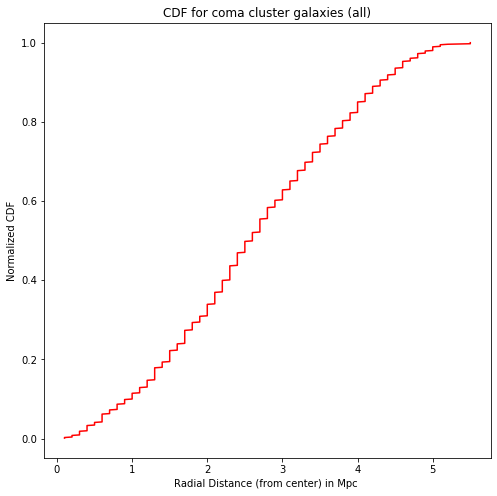

In [473]:
plt.figure(figsize=(8,8))


i = np.sort(L_ratio/L_ratio.sum())
h = np.arange(1, len(i)+1)/len(i)
pp = np.sort(p)
plt.plot(pp,h,'r-')
plt.xlabel('Radial Distance (from center) in Mpc ')
plt.ylabel('Normalized CDF')
plt.title('CDF for coma cluster galaxies (all)')



### 14. Next, with the redshifts of the galaxies, calculate their line of sight velocities using the Doppler formula.##
This line of sight velocity is the sum of the recessional velocity of the cluster and the peculiar velocity
of each galaxy. Subtracting the recessional velocity of Coma from these line of sight velocities, gives
the peculiar velocities of all the member galaxies.

In [45]:
c = 299892 # speed of light km/s
v_los,v_pec = np.asarray([]),np.asarray([])
v_los = c*z[output]
v_pec = v_los - vr

In [46]:
print('peculiar velocities of member galaxies:',v_pec)
print(v_pec.min())

peculiar velocities of member galaxies: [-1720.35713456  1304.5275148   1419.11025016  -134.68718132
 -1042.75116056  -299.12396276  -203.08354976   -44.42568716
   248.50581952   560.37250708  1041.87910228   810.88129144
  -724.83565136   133.30230772  -369.78751472   381.58289452
  -847.06863164  -770.40424076   565.98048748  1258.61704852
   604.42064404 -2067.97694636   353.02717828  1250.32503472
  -215.370125    -665.98484528   838.03651204  -664.28145872
    52.6733446   1693.04059972   806.14299784  -932.96069936
    43.26873148   364.36009696  -252.83263364  -586.60943072
  -917.117405    -131.13346112  -423.19827992 -1307.89767344
  -374.93066252  1022.08623028  3821.07723064  3645.19057264
  -896.3348894   -617.06946116  -153.49340864  -239.11257464
   672.36117664   298.33587424  4840.44312676   304.59162136
 -1392.80009756 -1006.33227608 -1156.09534196   649.11954664
 -1590.6298532  -1633.26249992  -209.08438868  -412.45314956
  -732.16501184 -1191.98641652  -481.54226852

### 15. Plot a histogram of the peculiar velocities (use any appropriate bin size). ### 
Fit a gaussian function
to this peculiar velocity histogram. Overplot the fitted gaussian function on the histogram.
The (1σ) standard deviation of this gaussian function is the line of sight velocity dispersion. The
velocity dispersion is normally denoted as σ (in km.s−1
) and is needed for determining the virial mass.

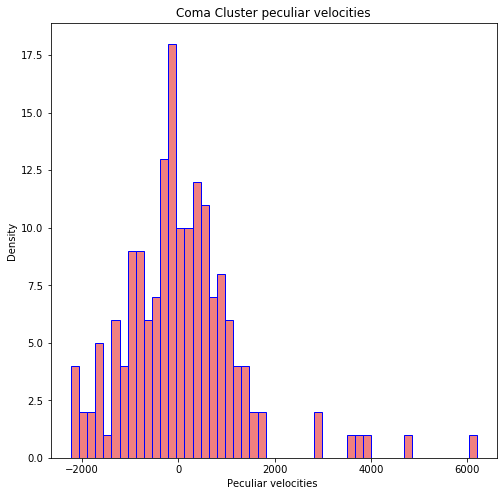

In [47]:
plt.figure(figsize=(8,8))

n=50
hist,vel_bin,_ = plt.hist(v_pec,bins=n,histtype='bar',ec='b', color='lightcoral')

plt.title('Coma Cluster peculiar velocities')
plt.xlabel('Peculiar velocities ')
plt.ylabel('Density')

bin_edges = hist
vel_bin = (bin_edges[:-1] + bin_edges[1:])/2

mean= 60.3900981126623 km.s−1 uncertainty= 1216.9201781254728 km.s−1


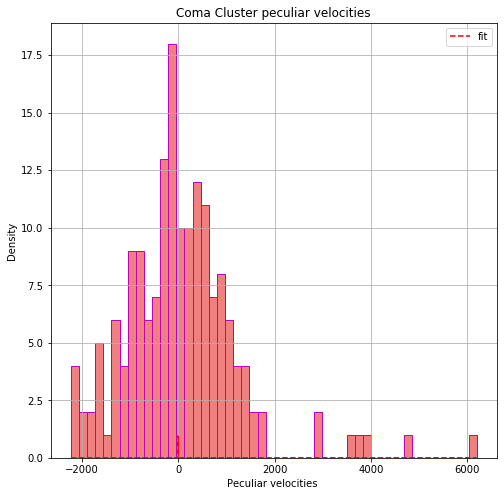

In [51]:
plt.figure(figsize=(8,8))

width = 0.001

n = math.ceil((v_pec.max() - v_pec.min())/width)
N = 50
ax1 = plt.hist(v_pec, bins = N, histtype='bar', ec='m', color='lightcoral')

plt.title('Coma Cluster peculiar velocities')
plt.xlabel('Peculiar velocities ')
plt.ylabel('Density')
plt.grid(1)
##########################################

mean = stat.mean(v_pec)
uncertainty = stat.stdev(v_pec)


a1 = 1 / (np.sqrt(2 * np.pi) * np.sqrt(uncertainty))

def Gauss1(v_pec, a1, mean, uncertainty):
    return a1*(np.exp(-((v_pec - mean)**2 / (2 * uncertainty))))

bin_heights, bin_borders, _ = ax1
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Gauss1, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, Gauss1(x_interval_for_fit, *popt),'r--',label='fit')

plt.legend()
##########################################
print('mean=',mean,'km.s−1','uncertainty=',uncertainty,'km.s−1')
plt.show()

### 16. Substitute the velocity dispersion, σ (from Step 15), and the half-mass radius,
r1/2 (from Step 13) in
the Virial mass equation, Equation 1 to obtain M1/2 of Coma Cluster. Use appropriate units.


$$\ M_{1/2} = 3σ^2r_{1/2}/G$$


In [56]:
## r_half is in MPC --> 2.74446115904495372e+22 meters
## sigma in km.s−1
#G = 6.674 ×10−11  (m3*kg−1.s−2 )


M_half = 3*((uncertainty*1000)**2)*(2.74446115904495372e+22)/6.674e-11

In [57]:
print('M_1/2 = ',M_half/2e30,'in M_sun, about = 9.13e14 M_sun')

M_1/2 =  913453260296608.4 in M_sun, about = 9.13e14 M_sun


## 17. Interpolate the normalized CDF of luminosity at half-mass radius, r1/2 to get L1/2, 
the total luminosity
within that radius (since this is the normalized value, remember to scale it by the total luminosity).

In [58]:
L_half = 0.4167976909035399*luminosity.sum()
LL = 1.03*luminosity.sum()

In [59]:
LL

1554393789689.2258

In [60]:
(M_half/2e30)/LL

587.6588457544195

In [ ]:
#alpha1 = 𝛼𝑔
#delta1 = 𝛿𝑔

#alpha = ra*(np.pi/180)
#delta = dec*(np.pi/180)
#print(alpha, delta)
#ã = A*(np.pi/180)
#ß = B*(np.pi/180)
#print(ã,ß)

#print('dist',R2)
#x1 = R2*np.cos(delta)*np.cos(alpha)
#y1 = R2*np.cos(delta)*np.sin(alpha)
#z1 = R2*np.sin(delta)

#x2 = R*np.cos(ß)*np.cos(ã)
#y2 = R*np.cos(ß)*np.sin(ã)
#z2 = R*np.sin(ß)

#dx = (x1 - x2)
#dy = (y1 - y2)
#dz = (z1 - z2)
#print(dx,dy,dz)
#d =[]
#d = np.sqrt((dx**2)+(dy**2)+(dz**2))

#######################################
#PHI = 2*np.arcsin(np.sqrt((np.sin((ß-delta)/2)**2)+np.cos(ß)*np.cos(delta)*(np.cos((ã-alpha)/2)**2))) ##Haversine
#H = PHI*(180/np.pi)
#print(d[1:12])

#p = R2*PHI
#print(p)